# Algoritme K-Nearest Neighbor
* Algoritme K-Nearest Neighbor adalah metode klasifikasi terhadap suatu obyek berdasarkan pembelajaran yang jaraknya lebih dekat dengan obyek tersebut (Lantz, 2013)
   
* Untuk menghitung jarak sering digunakan penghitungan Euclidean Distance


![jarak](../img/ed_dist.PNG)


### Konsep Dasar Algoritme K-Nearest Neighbor

Sebagai contoh, terdapat data training dan testing sebagai berikut:

![test](../img/train_tes_knn.PNG)

In [1]:
# import library dengan nama jokosuntoro_lib
from jokosuntoro_lib import *

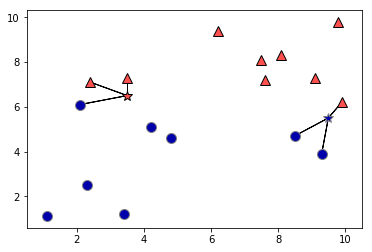

In [2]:
# visualisasi jika jarak tetangga terdekat adalah tiga
jokodm.plots.plot_knn_joko(n_neighbors=3)

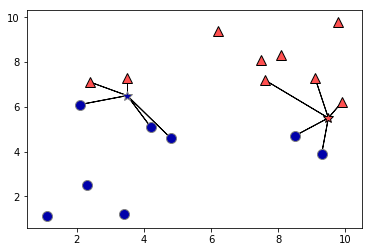

In [3]:
# visualisasi jika jarak tetangga terdekat adalah lima
jokodm.plots.plot_knn_joko(n_neighbors=5)

In [4]:
# menggunakan make_forge
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
# training
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
# testing
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [8]:
# accuracy score
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8571428571428571


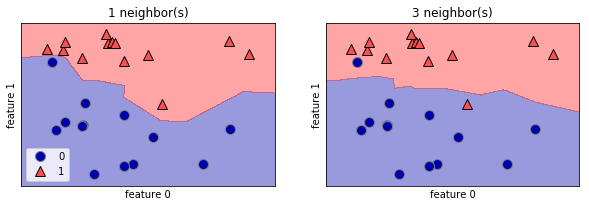

In [9]:
# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [10]:
# menggunakan data breast cancer
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [11]:
training_acc = []
test_acc = []
# setting n_neighbors dari 1 sampai 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # masukkan accuracy ke dalam list
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

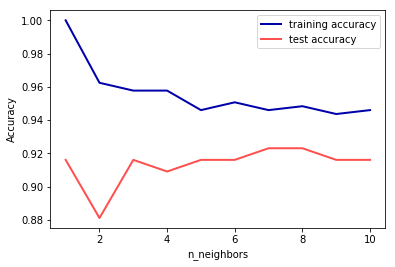

In [12]:
# plot data
plt.plot(neighbors_settings, training_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

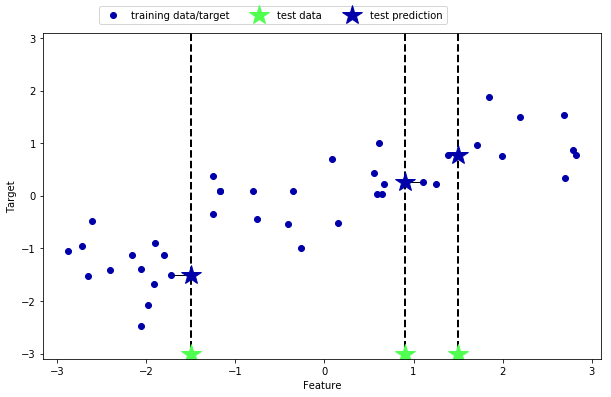

In [14]:
# k-NN Regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

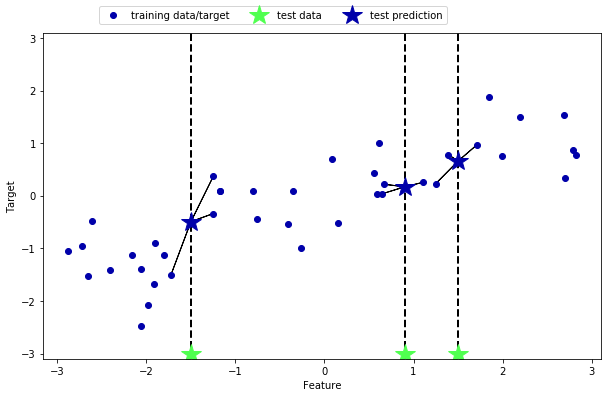

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("Test set prediction:", reg.predict(X_test))

Test set prediction: [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [17]:
print("Test set R^2:", reg.score(X_test, y_test))

Test set R^2: 0.8344172446249604


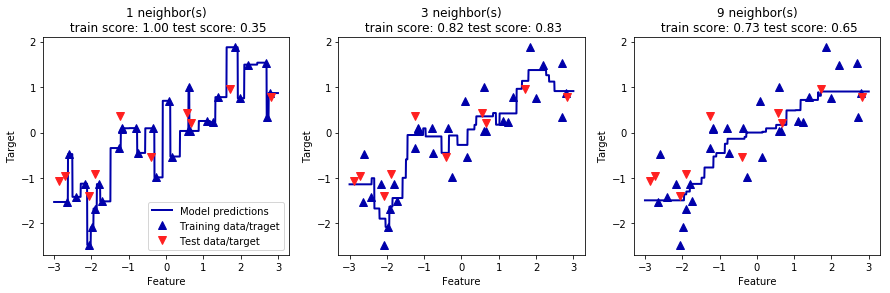

In [21]:
# visualisasi KNN Regressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# buat 1000 data point, nilainya antara -3 dan 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/traget", "Test data/target"], loc="best")